In [1]:
!pip3 install --upgrade tensorflow --user
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin

In [2]:
yfin.pdr_override()

df = pdr.get_data_yahoo('SPY', start='2010-01-01', end='2030-12-31')

print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04  112.370003  113.389999  111.510002  113.330002   87.791786   
2010-01-05  113.260002  113.680000  112.849998  113.629997   88.024178   
2010-01-06  113.519997  113.989998  113.430000  113.709999   88.086159   
2010-01-07  113.500000  114.330002  113.180000  114.190002   88.457970   
2010-01-08  113.889999  114.620003  113.660004  114.570000   88.752365   
...                ...         ...         ...         ...         ...   
2023-06-21  436.160004  436.989990  434.329987  434.940002  434.940002   
2023-06-22  433.950012  436.619995  433.600006  436.510010  436.510010   
2023-06-23  432.929993  435.059998  432.470001  433.209991  433.209991   
2023-06-26  432.619995  434.609985  431.190002  431.440002  431.440002   
2023-06-27  432.350006  433.299988  431.885

In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-21,436.160004,436.989990,434.329987,434.940002,434.940002,76982300
2023-06-22,433.950012,436.619995,433.600006,436.510010,436.510010,70637200
2023-06-23,432.929993,435.059998,432.470001,433.209991,433.209991,92028700
2023-06-26,432.619995,434.609985,431.190002,431.440002,431.440002,72636200
2023-06-27,432.350006,433.299988,431.885010,433.109985,433.109985,13200447


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,112.370003,113.389999,111.510002,113.330002,87.791786,118944600
1,2010-01-05,113.260002,113.680000,112.849998,113.629997,88.024178,111579900
2,2010-01-06,113.519997,113.989998,113.430000,113.709999,88.086159,116074400
3,2010-01-07,113.500000,114.330002,113.180000,114.190002,88.457970,131091100
4,2010-01-08,113.889999,114.620003,113.660004,114.570000,88.752365,126402800


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,112.370003,113.389999,111.510002,113.330002,118944600
1,113.260002,113.680000,112.849998,113.629997,111579900
2,113.519997,113.989998,113.430000,113.709999,116074400
3,113.500000,114.330002,113.180000,114.190002,131091100
4,113.889999,114.620003,113.660004,114.570000,126402800


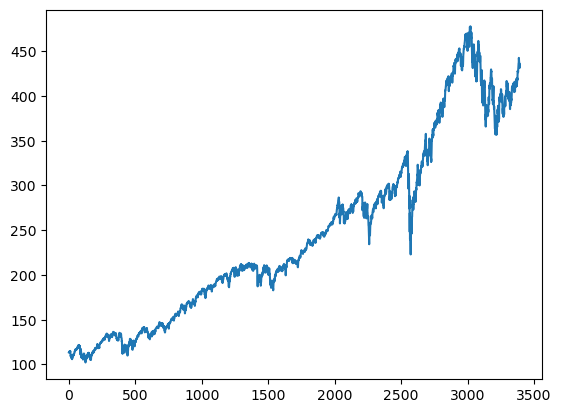

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,112.370003,113.389999,111.510002,113.330002,118944600
1,113.260002,113.680000,112.849998,113.629997,111579900
2,113.519997,113.989998,113.430000,113.709999,116074400
3,113.500000,114.330002,113.180000,114.190002,131091100
4,113.889999,114.620003,113.660004,114.570000,126402800
...,...,...,...,...,...
3388,436.160004,436.989990,434.329987,434.940002,76982300
3389,433.950012,436.619995,433.600006,436.510010,70637200
3390,432.929993,435.059998,432.470001,433.209991,92028700
3391,432.619995,434.609985,431.190002,431.440002,72636200


In [8]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3388    410.2083
3389    410.5166
3390    410.8428
3391    411.0924
3392    411.3155
Name: Close, Length: 3393, dtype: float64

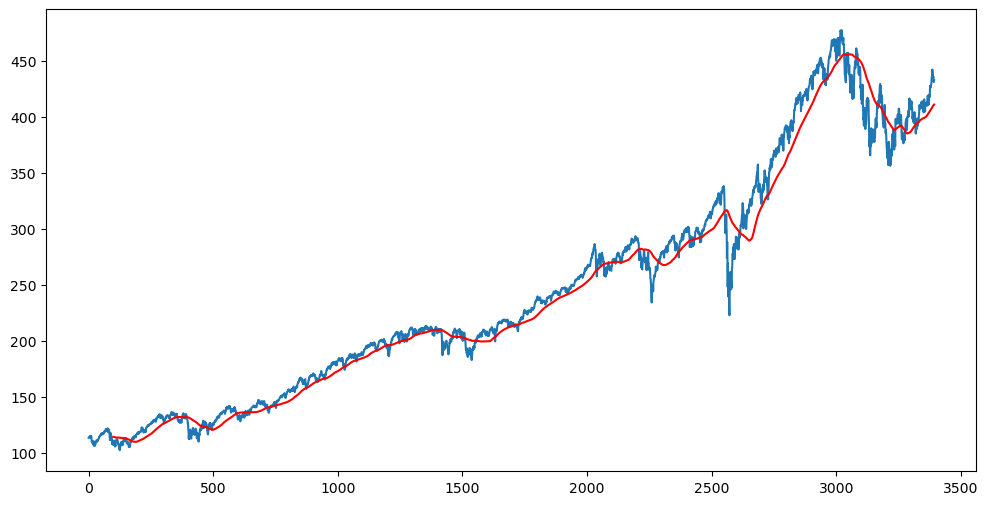

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200=df.Close.rolling(100).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3388    410.2083
3389    410.5166
3390    410.8428
3391    411.0924
3392    411.3155
Name: Close, Length: 3393, dtype: float64

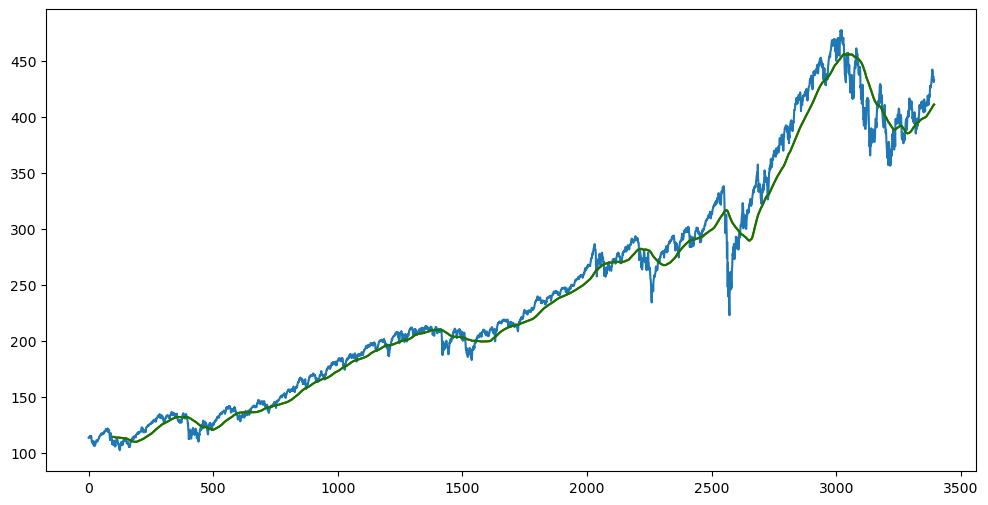

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(3393, 5)

In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2375, 1)
(1018, 1)


In [14]:
data_training.head()

,Close
0,113.330002
1,113.629997
2,113.709999
3,114.190002
4,114.570000


In [15]:
data_testing.head()

,Close
2375,288.390015
2376,289.579987
2377,289.260010
2378,289.369995
2379,292.399994


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05802015],
       [0.05958401],
       [0.06000105],
       ...,
       [0.96674136],
       [0.97362249],
       [0.97325755]])

In [18]:
data_training_array.shape

(2375, 1)

In [19]:
x_train=[]
y_train = []

In [20]:
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(2275, 100, 1)

In [22]:
#ML Model

In [23]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences = True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=120, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 120)          9

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
72/72 [==============================] - 27s 266ms/step - loss: 0.1135
Epoch 2/10
72/72 [==============================] - 20s 281ms/step - loss: 0.0848
Epoch 3/10
72/72 [==============================] - 23s 319ms/step - loss: 0.0829
Epoch 4/10
72/72 [==============================] - 18s 255ms/step - loss: 0.0817
Epoch 5/10
72/72 [==============================] - 18s 253ms/step - loss: 0.0808
Epoch 6/10
72/72 [==============================] - 18s 251ms/step - loss: 0.0803
Epoch 7/10
72/72 [==============================] - 18s 249ms/step - loss: 0.0796
Epoch 8/10
72/72 [==============================] - 18s 252ms/step - loss: 0.0793
Epoch 9/10
72/72 [==============================] - 18s 253ms/step - loss: 0.0789
Epoch 10/10
72/72 [==============================] - 18s 255ms/step - loss: 0.0789


In [27]:
model.save('C:\\Users\\Abdul Basit\\Desktop\\Stock Prediction')

INFO:tensorflow:Assets written to: C:\Users\Abdul Basit\Desktop\Stock Prediction\assets


INFO:tensorflow:Assets written to: C:\Users\Abdul Basit\Desktop\Stock Prediction\assets


In [28]:
data_testing.head()

,Close
2375,288.390015
2376,289.579987
2377,289.260010
2378,289.369995
2379,292.399994


In [29]:
data_training.tail(100)

,Close
2275,262.959991
2276,266.459991
2277,262.859985
2278,263.410004
2279,263.549988
...,...
2370,282.959991
2371,284.799988
2372,287.649994
2373,288.970001


In [30]:
past_100_days=data_training.tail(100)

In [31]:
final_df=past_100_days.append(data_testing, ignore_index=True)

C:\Users\Abdul Basit\AppData\Local\Temp\ipykernel_5516\351597942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing, ignore_index=True)


In [32]:
final_df.head()

,Close
0,262.959991
1,266.459991
2,262.859985
3,263.410004
4,263.549988


In [33]:
input_data = scaler.inverse_transform(final_df)

In [34]:
input_data

array([[50545.81563927],
       [51217.22064568],
       [50526.63146825],
       ...,
       [83204.87345101],
       [82865.33645527],
       [83185.68927999]])

In [35]:
input_data.shape

(1118, 1)

In [36]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1018, 100, 1)
(1018,)


In [38]:
#Making predictions

y_predicted = model.predict(x_test)


32/32 [==============================] - 4s 95ms/step


In [39]:
y_predicted.shape

(1018, 100, 1)

In [40]:
y_predicted


array([[[ 3.5082877e+02],
        [ 2.1345406e+02],
        [ 1.6786700e+02],
        ...,
        [ 7.2905578e+04],
        [ 1.5222548e+04],
        [ 4.3363145e+04]],

       [[ 3.5552750e+02],
        [ 2.6176883e+02],
        [ 4.3360435e+01],
        ...,
        [-4.5215047e+04],
        [-2.8969424e+04],
        [ 2.5130172e+04]],

       [[ 3.5069449e+02],
        [ 2.2304646e+02],
        [ 4.0686012e+01],
        ...,
        [ 6.3067310e+03],
        [ 1.3740045e+04],
        [ 2.4625090e+02]],

       ...,

       [[ 5.3550555e+02],
        [ 2.9430524e+02],
        [ 1.9052691e+01],
        ...,
        [ 1.3131116e+04],
        [ 5.1548934e+04],
        [ 1.9455604e+04]],

       [[ 5.4339563e+02],
        [ 2.9816757e+02],
        [ 7.5913887e+01],
        ...,
        [ 5.1549009e+03],
        [-4.8366190e+02],
        [ 3.4172102e+03]],

       [[ 5.4918176e+02],
        [ 3.0114395e+02],
        [ 6.6695854e+01],
        ...,
        [-1.9789156e+04],
        [-2.765

In [41]:
y_predicted_new = y_predicted[:,0,:]


In [42]:
print(y_predicted_new.shape)


(1018, 1)


In [43]:
y_test

array([55424.05703502, 55652.32935134, 55590.94819994, ...,
       83204.87345101, 82865.33645527, 83185.68927999])

In [44]:
scaler.scale_

array([0.00521295])

In [45]:
scale_factor = 1/0.02099517
#y_predicted = y_predicted * scale_factor
#y_predicted_new = y_predicted_new * scale_factor
#y_test = y_test * scale_factor

In [46]:
print(y_predicted_new.shape)


(1018, 1)


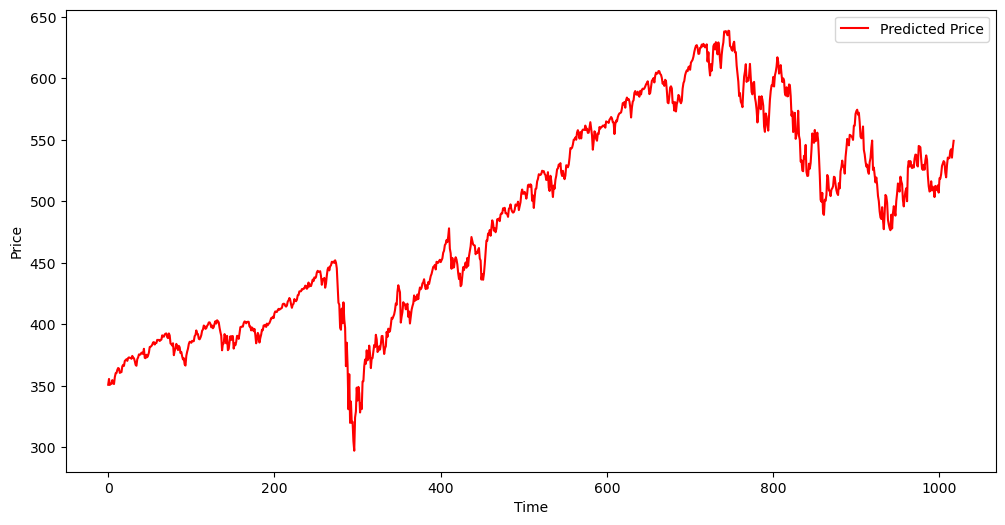

In [47]:
plt.figure(figsize=(12,6))
#plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted_new, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()